In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# dane pochodzą z https://www.kaggle.com/datasets/brendan45774/test-file

In [3]:
train = pd.read_csv('Data/titanic_train.csv')
train.head()

#ZAPOZNANIE SIE Z DANYMI

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
# tabela zawiera 12 kolumn (7 numerycznych i 5 tekstowych) i 891 wierszy
# kolumny Age, Cabin i Embarked mają braki

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe().T
# podstawowe infornacje o danych numerycznych

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
train[['Age', 'Cabin', 'Embarked']].isnull().sum()/train.shape[0]* 100
# ile procent danych brakuje w poszczególnych kolumnach
# duże braki w kolumnie Cabin -> można usunąć tą kolumnę
# w kolumnie Age trzeba będzie uzupełnić brakujące dane
# wiersze które mają brakujące wartości w kolumnie Embarked można usunąć

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

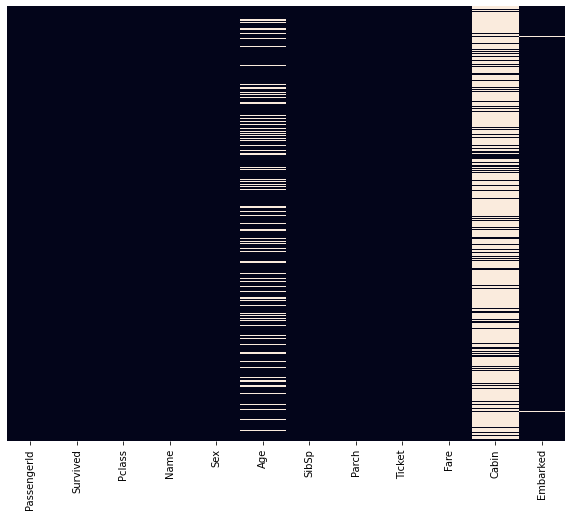

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False);
# graficzne przedstawienie gdzie są wartości NaN

0    0.616162
1    0.383838
Name: Survived, dtype: float64

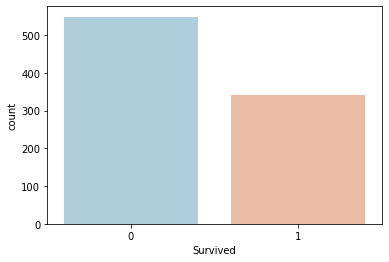

In [8]:
# ile osob przeżyło
sns.countplot(x='Survived', data = train, palette='RdBu_r');
train['Survived'].value_counts()/train.shape[0]
# 62% nie przeżyło - tylko 38% osób ocalało
# klasy są reprezentatywne

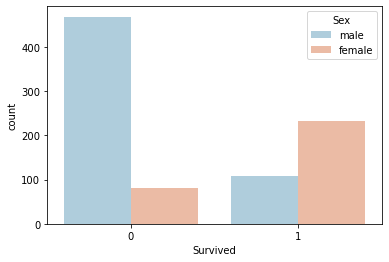

In [9]:
sns.countplot(x='Survived', data = train, hue = 'Sex', palette='RdBu_r');
#widać tutaj trend  - więcej mężczyzn zgineło (powyżej 400 ) , kobiet poniżej 100
#a przeżyło więcej kobiet (powyżej 200 do ok 100)

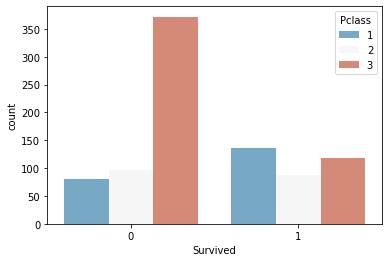

In [10]:
sns.countplot(x='Survived', data = train, hue = 'Pclass', palette='RdBu_r');
#najwięcej zgineło pasażerów 3 klasy - bo było ich najwięcej
#najwięcje przeżyło pasażerów 1 klasy - bo pierwsi byli dawani do szalup

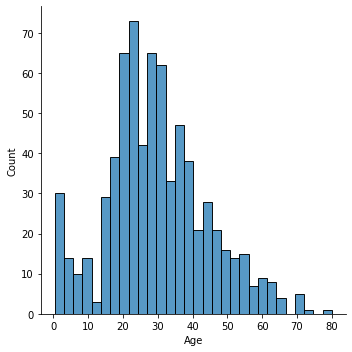

In [11]:
sns.displot(train['Age'].dropna(), kde = False, bins = 30, palette='RdBu_r');
#rozkład wieku pasazerów
# dużo było małych dzieci i osbób w wieku między 20 a 35 lat

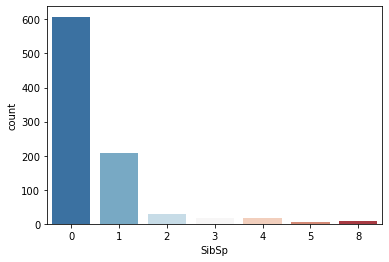

In [12]:
sns.countplot(x='SibSp', data=train, palette='RdBu_r');
#dużo osbó nie miało dzieci ani współmałżonków na pokładzie
#na drugim miejscu jest 1 na co wychodzi ze duzo małżonków (prawdopodobnie)

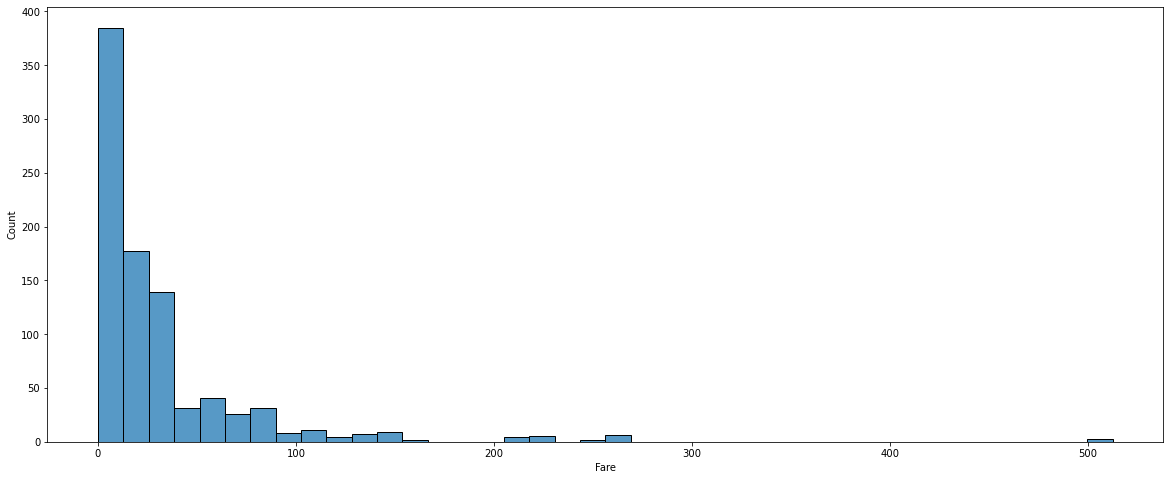

In [13]:
plt.figure(figsize=(20,8))
sns.histplot(data = train['Fare'],bins = 40, palette='RdBu_r');
#najwięcej osób było z najtanszym biletem (między 0 a 50 waluty) - na co wychodzi ze to pasażerowie 3 klasy, których było nijwięcej

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

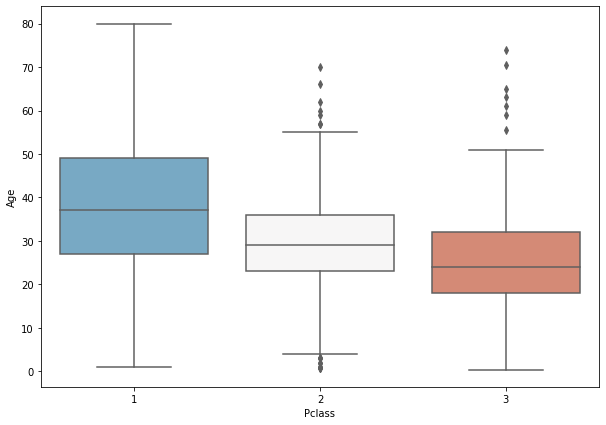

In [14]:
###CZYSZCZENIE DANYCH
#widać ze brakuje sporej ilosci danych jezeli chodzi o wiek wiec fajnie by bylo je wypełnic 
#mozna to zrobic wpakowując średni wiek pasażerów (imputacja)
# można też wziąć średnią wieki jeżeli chodzi o klasę 
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette='RdBu_r')
#widać że w każdej kasie jest inna średnia wieku
#można to wykożystać do wypełnienia wieku pasażerów zależnie od której klasy bilet mieli

In [15]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [16]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [17]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [19]:
#uzupełnianie kolumny Age
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

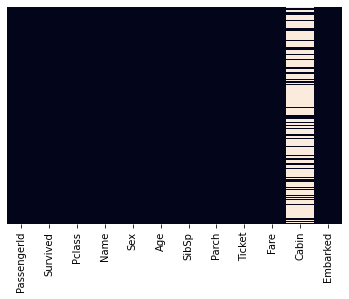

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False);

In [21]:
#usunięcie kolumny Cabin
train.drop('Cabin', axis = 1, inplace=True)
# usunięcie wierszy z pozostłymi nullami
train.dropna(inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
#tworzenie zmiennych 0-1 (OneHot) na kolumnach kategorycznych 
# koluna Sex i Embarked
sex = pd.get_dummies(train['Sex'],drop_first=True) 
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [24]:
# dodawanie kolumny do główniej tabeli
train = pd.concat([train,sex,embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [25]:
#usuwanie komumny które nie dają nam żadej informacji o przezywalnośći pasażerów 
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
# podział danych na X i y
X = train.drop('Survived', axis = 1).to_numpy()
y = train['Survived'].to_numpy()

In [27]:
# podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=101)

In [28]:
#tworzenie instancji
lr = LogisticRegression(max_iter=1000)

In [29]:
#trenowanie modelu
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
#gererowanie predykcji
predictions = lr.predict(X_test)

In [31]:
print(classification_report(y_test, predictions))
# logarytm dobrze dopasował 84% danych (accuracy)
# model dobrze zakwalifikowałm 85% pasażerów, którzy nie przeżyli katastrofy (precision)
# czułość modelu wynosi 70% co oznacza że z 10 przypadków 3 przypadków nie wyłapał jako ofiary śmiertelne (recall)
# wartość f1 (średnia harmoniczna z precision i recall) mówi nam o tym że model jest dobry w 77%

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [32]:
print(confusion_matrix(y_test,predictions))
print('Liczba wszytkich przypadków: ',149+14+33+71 )

[[150  13]
 [ 31  73]]
Liczba wszytkich przypadków:  267


In [33]:
# 223 przypadków było dobrze zakwalifikowanych 150 (0) i  73  (1)
# 13 przypadków zostało źle zakwalifkowanych jako False Pozitive (Error I) - nieprzeżyli zakfalifikowani, że przeżyli
# 31 przypadki zastały żle zakfalifikowane jako False Negative (Erro II) - przyżyli a algorytm ich zakfalifikował jako ofiary katastrofy

In [34]:
# walidacja na danych testowych
df = pd.read_csv('Data/titanic_test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
#przygotowanie danych
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)
df.drop('Cabin', axis = 1, inplace=True)
df.dropna(inplace=True)
sex = pd.get_dummies(df['Sex'],drop_first=True) 
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df,sex,embark], axis=1)
df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'], axis = 1, inplace = True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [39]:
X = train.drop('Survived', axis = 1).to_numpy()
y = train['Survived'].to_numpy()
predictions = lr.predict(X)

In [40]:
print(classification_report(y, predictions))
# logarytm dobrze dopasował 82% danych (accuracy) - zmalało
# model dobrze zakwalifikowałm 79% pasażerów, którzy nie przeżyli katastrofy (precision) - też zmalało
# czułość modelu wynosi 70% co oznacza że z 10 przypadków 3 przypadków nie wyłapał jako ofiary śmiertelne (recall) - tutaj poprawiło się o 1%
# wartość f1 (średnia harmoniczna z precision i recall) mówi nam o tym że model jest dobry w 77% - parametr zmalał

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       549
           1       0.79      0.71      0.75       340

    accuracy                           0.82       889
   macro avg       0.81      0.79      0.80       889
weighted avg       0.81      0.82      0.81       889



In [42]:
print(confusion_matrix(y,predictions))
print('Liczba wszytkich przypadków: ',485+240+64+100 )
# 889 przypadków było dobrze zakwalifikowanych 485 (0) i  240  (1)
# 64 przypadków zostało źle zakwalifkowanych jako False Pozitive (Error I) - nieprzeżyli zakfalifikowani, że przeżyli
# 100 przypadki zastały żle zakfalifikowane jako False Negative (Erro II) - przyżyli a algorytm ich zakfalifikował jako ofiary katastrofy

[[485  64]
 [100 240]]
Liczba wszytkich przypadków:  889
